In [7]:
print ("UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD")
print ("REGRESION LINEAL")
print ("SARA LUCIA CORREDOR NARANJO")
print ("Conjunto de Datos de Vehiculos")

UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD
REGRESION LINEAL
SARA LUCIA CORREDOR NARANJO
Conjunto de Datos de Vehiculos


In [8]:
print ("PASOS DE LA ACTIVIDAD")
print ("1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.")

PASOS DE LA ACTIVIDAD
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.


In [11]:
#Cargar Librerias necesarias
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

#Librerias para implementar modelos de ciencia de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [12]:
df = pd.read_csv('C:/UNAD/cardata.csv')

In [13]:
df.head(20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       

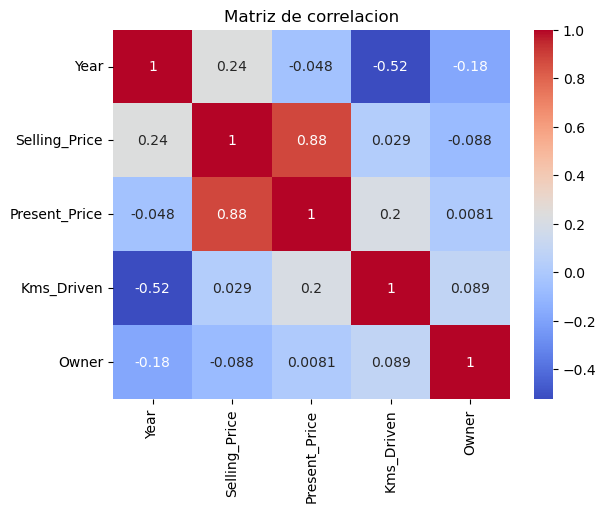

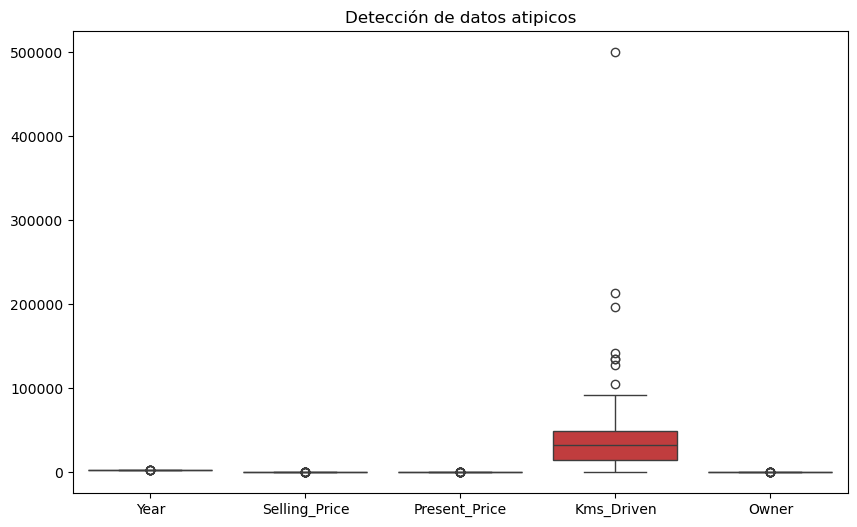

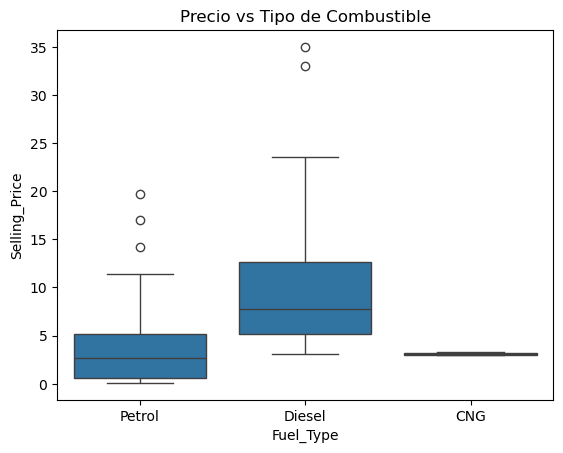

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt 

#informacion general
print(df.info())
print(df.describe())
print(df.nunique())

#matriz de correlacion solo columnas numericas
df_numeric = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlacion")
plt.show()

#atipicos
plt.figure(figsize=(10,6))
sns.boxplot(data=df_numeric)
plt.title("Detección de datos atipicos")
plt.show()

sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title("Precio vs Tipo de Combustible")
plt.show()

In [32]:
print ("2. Procesar los datos limpiándolos, tratando valores faltantes y transformandolos segun sea necesario.")

2. Procesar los datos limpiándolos, tratando valores faltantes y transformandolos segun sea necesario.


In [33]:
#Eliminar columna que no aporta al modelo
df = df.drop(columns=['Car_Name'])

#Convertir variables categoricas a numericas
df_clean = pd.get_dummies(df, drop_first=True)

#Verificar valores faltantes
print(df_clean.isnull().sum())

#Variables numericas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_clean[['Present_Price', 'Kms_Driven']] = scaler.fit_transform(df_clean[['Present_Price', 'Kms_Driven']])

Year                      0
Selling_Price             0
Present_Price             0
Kms_Driven                0
Owner                     0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Transmission_Manual       0
dtype: int64


In [22]:
print ("3. Seleccionar las caracteristicas más relevantes para entrenar el modelo utilizando seleccion de caracteristicas.")

3. Seleccionar las caracteristicas más relevantes para entrenar el modelo utilizando seleccion de caracteristicas.


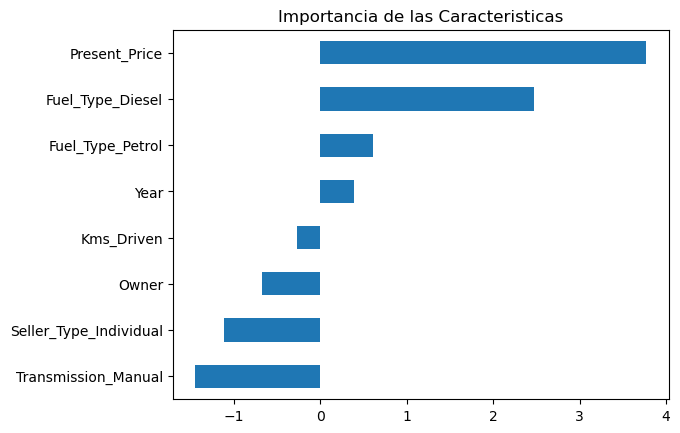

In [41]:
from sklearn.linear_model import LinearRegression

x = df_clean.drop(['Selling_Price'], axis=1)
y = df_clean['Selling_Price']

#Entrenar modelo base
model = LinearRegression()
model.fit(x, y)

#importancia de las caracteristicas
importances = pd.Series(model.coef_, index=x.columns)
importances.sort_values().plot(kind='barh', title="Importancia de las Caracteristicas")
plt.show()

In [42]:
print ("4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.")

4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df_clean.drop(['Selling_Price'], axis=1)
y = df_clean['Selling_Price']

#Dividir los datos en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [44]:
print ("5. Entrenar el modelo configurando los diferentes hiperparametros.")

5. Entrenar el modelo configurando los diferentes hiperparametros.


In [45]:
modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

In [46]:
print ("6. Evaluar el desempeño del modelo en el conjunto Test con métricas como precisión, recall, F1-score, etc.")

6. Evaluar el desempeño del modelo en el conjunto Test con métricas como precisión, recall, F1-score, etc.


In [47]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = modelo.predict(x_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 3.4788039706378524
R2 Score: 0.8489813024899088


In [48]:
print ("7. Realizar las diferentes graficas que permitan visualizar los resultados del modelo.")

7. Realizar las diferentes graficas que permitan visualizar los resultados del modelo.


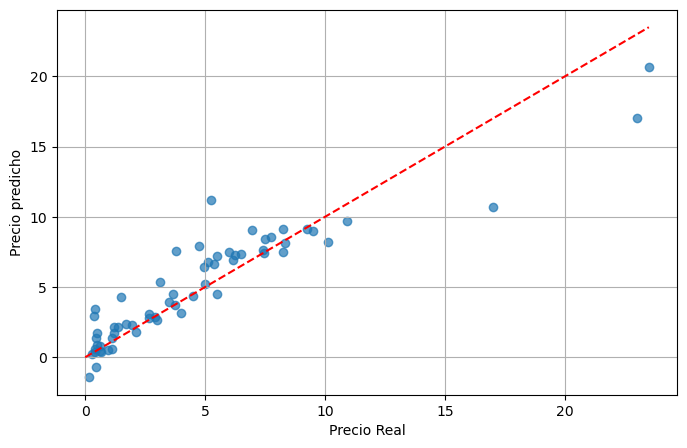

In [49]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0, max(y_test)], [0, max(y_test)], '--r')
plt.xlabel("Precio Real")
plt.ylabel("Precio predicho")
plt.grid(True)
plt.show()

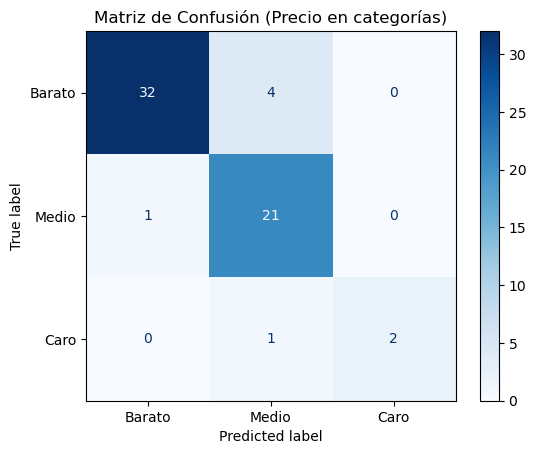

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Convertimos precios reales y predichos a categorías (ej. barato, medio, caro)
def categorizar_precio(precio):
    if precio < 5:
        return "Barato"
    elif precio < 15:
        return "Medio"
    else:
        return "Caro"

y_test_clas = y_test.apply(categorizar_precio)
y_pred_clas = pd.Series(y_pred).apply(categorizar_precio)

# Crear matriz de confusión
matriz = confusion_matrix(y_test_clas, y_pred_clas, labels=["Barato", "Medio", "Caro"])
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=["Barato", "Medio", "Caro"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión (Precio en categorías)")
plt.show()

In [52]:
print ("8.Interpretar, análizar y documentar los resultados obtenidos.")

8.Interpretar, análizar y documentar los resultados obtenidos.


In [53]:
# Interpretación y análisis de resultados
print("""
- El modelo de Regresio Lineal fue entrenado para predecir el Selling Price de un automovil a partir de las caracteristicas como el precio original,
tipo de combustible, transmisión, kilómetros recorridos, entre otros. 
- La métrica R2 coeficiente de determinacion muestra que tan bien se ajusta el modelo de datos, si un valor cercano a 1.0 indica excelente capacidad de
excelencia, mientras que un valor intermedio indica que el desempeño general mejora.
- Las variables con mayor impacto en la prediccion del precio son: Present_Price tuvo mayor impacto, Fuel_Type el combustible diesel tiende a tener precios
altos y Transmission_Manual autos manuales suelen ser precios mas bajos.
- Con la matriz de confusión se tuvieron en cuenta categorias de Barato, Medio y caro, que indico un buen rendimiento al clasificar autos bartos y medio 
- El modelo de Regresioin Lineal logra predecir el precio de los automoviles con buen rendimiento general y lkas variables que ayudan a identificar esto son 
son Present Price, el combustible y la transmision.
""")


- El modelo de Regresio Lineal fue entrenado para predecir el Selling Price de un automovil a partir de las caracteristicas como el precio original,
tipo de combustible, transmisión, kilómetros recorridos, entre otros. 
- La métrica R2 coeficiente de determinacion muestra que tan bien se ajusta el modelo de datos, si un valor cercano a 1.0 indica excelente capacidad de
excelencia, mientras que un valor intermedio indica que el desempeño general mejora.
- Las variables con mayor impacto en la prediccion del precio son: Present_Price tuvo mayor impacto, Fuel_Type el combustible diesel tiende a tener precios
altos y Transmission_Manual autos manuales suelen ser precios mas bajos.
- Con la matriz de confusión se tuvieron en cuenta categorias de Barato, Medio y caro, que indico un buen rendimiento al clasificar autos bartos y medio 
- El modelo de Regresioin Lineal logra predecir el precio de los automoviles con buen rendimiento general y lkas variables que ayudan a identificar esto son 
s

In [54]:
print ("Gracias")

Gracias
